# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load Amazon Polarity dataset (subset for demonstration)
dataset = load_dataset("fancyzhx/amazon_polarity", split='train[:10000]')
df = pd.DataFrame(dataset)
df.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,label,title,content
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [ ]:
# Map labels: 0 → Negative, 1 → Positive
df['label'] = df['label'].map({0: 'negative', 1: 'positive'})
df = df[['content', 'label']]
df.head()

,content,label
0,This sound track was beautiful! It paints the ...,positive
1,I'm reading a lot of reviews saying that this ...,positive
2,This soundtrack is my favorite music of all ti...,positive
3,I truly like this soundtrack and I enjoy video...,positive
4,"If you've played the game, you know how divine...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
 1   label    10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
content,10000,9998,"A well-crafted, sharp-witted tale that will be...",2
label,10000,2,negative,5097


In [ ]:
df.tail()

,content,label
9995,"Though a scholarly biography, the book reveals...",positive
9996,"This biography of Arthur Aull, a small-town jo...",positive
9997,You'd be hard-pressed to tell a boring story a...,negative
9998,The box looked used and it is obviously not ne...,negative
9999,The pen was shipped promptly. This is the clas...,positive


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#Text Cleaning and Preprocessing

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['content'].apply(preprocess)

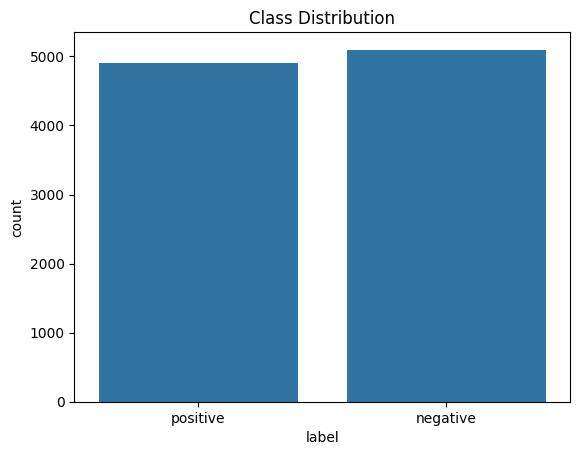

In [ ]:
#Exploratory data analysis
# Class Distribution

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.show()

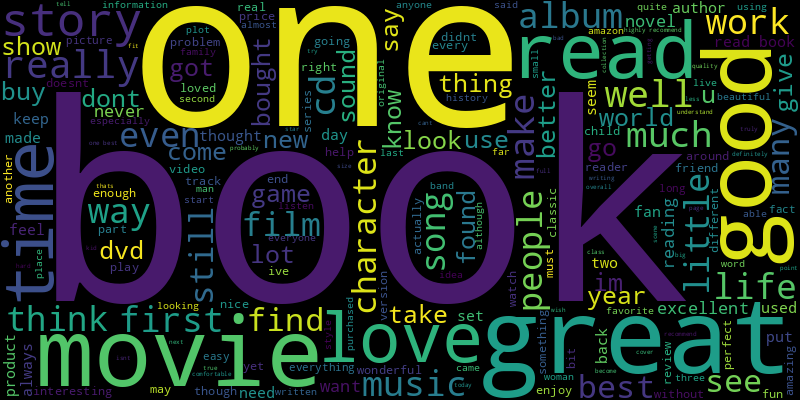

<Figure size 1000x400 with 0 Axes>

In [ ]:
#World cloud

from wordcloud import WordCloud

positive_text = ' '.join(df[df['label'] == 'positive']['clean_text'])
negative_text = ' '.join(df[df['label'] == 'negative']['clean_text'])

plt.figure(figsize=(10, 4))
WordCloud(width=800, height=400).generate(positive_text).to_image()

In [ ]:
# N-gram
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None, ngram_range=(1,1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

print(get_top_ngrams(df[df['label'] == 'positive']['clean_text'], n=10, ngram_range=(2,2)))


[('read book', 248), ('highly recommend', 133), ('one best', 130), ('would recommend', 113), ('year old', 103), ('year ago', 101), ('book read', 99), ('recommend book', 88), ('great book', 80), ('reading book', 74)]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Vectorization
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define pipelines for each model with TF-IDF + classifier
pipelines = {
    'SVM': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', SVC())
    ]),
    'Naive Bayes': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', MultinomialNB())
    ]),
    'XGBoost': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}

# Define parameter grids for each model
param_grids = {
    'SVM': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    'Naive Bayes': {
        'clf__alpha': [0.1, 1.0, 5.0]
    },
    'XGBoost': {
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [3, 5],
        'clf__learning_rate': [0.1, 0.3]
    }
}


In [ ]:
# Perform Grid Search with Cross-Validation for each model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
le = LabelEncoder()  # Create a LabelEncoder object

for model_name in pipelines:
    print(f"\n--- Tuning {model_name} ---")
    grid = GridSearchCV(
        pipelines[model_name],
        param_grids[model_name],
        cv=cv,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )

    # Encode labels before fitting
    y_train_encoded = le.fit_transform(y_train)
    grid.fit(X_train, y_train_encoded)  # Use encoded labels for training

    print(f"Best Params for {model_name}: {grid.best_params_}")

    # Encode labels before prediction
    y_test_encoded = le.transform(y_test)
    preds = grid.predict(X_test)

    # For confusion matrix and classification_report, use appropriate labels
    print(confusion_matrix(y_test_encoded, preds))
    print(classification_report(y_test, le.inverse_transform(preds)))


--- Tuning SVM ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params for SVM: {'clf__C': 10, 'clf__kernel': 'rbf'}
[[841 178]
 [177 804]]
              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      1019
    positive       0.82      0.82      0.82       981

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000


--- Tuning Naive Bayes ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params for Naive Bayes: {'clf__alpha': 1.0}
[[842 177]
 [217 764]]
              precision    recall  f1-score   support

    negative       0.80      0.83      0.81      1019
    positive       0.81      0.78      0.80       981

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000


--- Tuning XGBoost ---
F

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params for XGBoost: {'clf__learning_rate': 0.3, 'clf__max_depth': 5, 'clf__n_estimators': 100}
[[803 216]
 [187 794]]
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1019
    positive       0.79      0.81      0.80       981

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



In [ ]:
from transformers import pipeline

# Load sentiment classifier pipeline (RoBERTa by default)
classifier = pipeline("sentiment-analysis")

# Inference (Example)
print(classifier("This course is amazing!"))
print(classifier("Terrible quality. Not recommended."))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998824596405029}]
[{'label': 'NEGATIVE', 'score': 0.9996393918991089}]


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [ ]:
# Creating empty lists at first to hold labels and messages
labels = []
texts = []

# Creating empty lists to contain labels and texts and performing initialization on them
with open("stsa-train.txt", "r") as file:
    for line in file:
        # Separation of the line into its label and text components
        label, text = line.split(' ', 1)

        # Adding the label as well as the text to the appropriate lists.
        labels.append(int(label))
        texts.append(text.strip())  # Elimination of leading and trailing whitespaces in the expression

# Constructing a DataFrame out of the lists
df = pd.DataFrame({'Label': labels, 'Text': texts})

# viewing head of dataframe
df.head()


,Label,Text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [ ]:
df.shape

(6920, 2)

In [ ]:
df["Label"].unique()

array([1, 0])

In [ ]:
df["Label"].value_counts()

,count
Label,
1,3610
0,3310


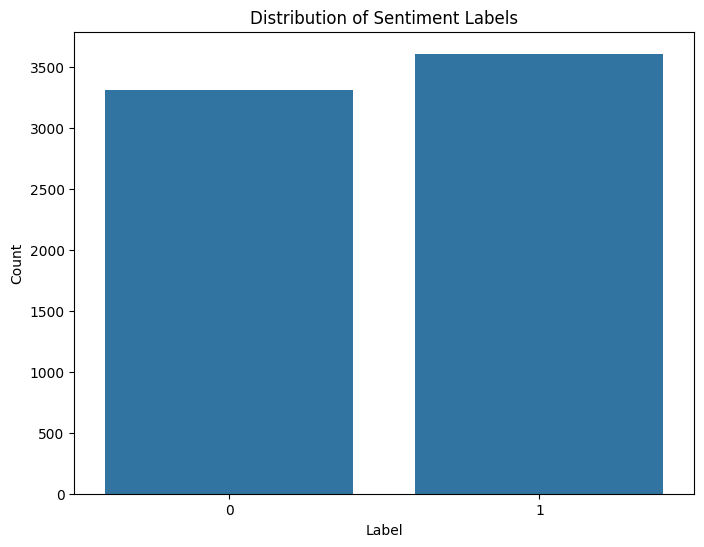

In [ ]:
# Creating a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x="Label", data=df)

# Adding labels and title
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Labels")
plt.show()


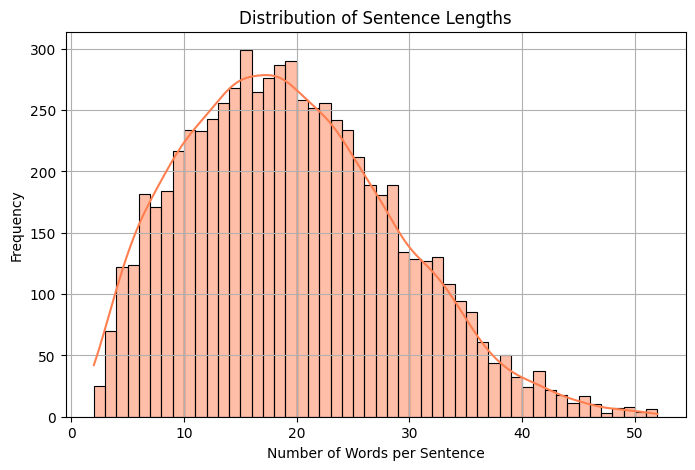

In [ ]:
# Visualize sentence length distribution
df['text_length'] = df['Text'].apply(lambda x: len(str(x).split()))  # Use 'Text' column from 'df'
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50, kde=True, color='coral')  # Use 'df' here as well
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Number of Words per Sentence")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   6920 non-null   int64 
 1   Text    6920 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.3+ KB


In [ ]:
df.describe()

,Label
count,6920.000000
mean,0.521676
std,0.499566
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
#checking for columns data type
df.dtypes

,0
Label,int64
Text,object


In [ ]:
#checking for null values
df.isnull().sum()

,0
Label,0
Text,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def text_preprocessing(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove digits
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    words = text.split()  # tokenize manually
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]  # remove stopwords
    return ' '.join(words)


In [ ]:
#creating new col for cleaned test
df['Cleaned_Text'] = df['Text'].apply(text_preprocessing)

In [ ]:
df.head()

,Label,Text,Cleaned_Text
0,1,"a stirring , funny and finally transporting re...",stirring funny finally transporting reimaginin...
1,0,apparently reassembled from the cutting-room f...,apparently reassembled cuttingroom floor given...
2,0,they presume their audience wo n't sit still f...,presume audience wo nt sit sociology lesson en...
3,1,this is a visually stunning rumination on love...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been t...,jonathan parker s bartleby beallendall moderno...


In [ ]:
#creating new datframe with two columns label and cleaned text
df1 = df[["Label","Cleaned_Text"]]
df1.head()

,Label,Cleaned_Text
0,1,stirring funny finally transporting reimaginin...
1,0,apparently reassembled cuttingroom floor given...
2,0,presume audience wo nt sit sociology lesson en...
3,1,visually stunning rumination love memory histo...
4,1,jonathan parker s bartleby beallendall moderno...


In [ ]:
#make into clened text into  list
corpus = df1['Cleaned_Text'].tolist()
corpus[1:6]

['apparently reassembled cuttingroom floor given daytime soap',
 'presume audience wo nt sit sociology lesson entertainingly presented trot conventional sciencefiction elements bugeyed monsters futuristic women skimpy clothes',
 'visually stunning rumination love memory history war art commerce',
 'jonathan parker s bartleby beallendall modernoffice anomie films',
 'campanella gets tone just right funny middle sad middle hopeful']

In [ ]:
# Creating the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer

TfidfVectorizer()

In [ ]:
# Transforming the text data into numerical features
X = tfidf_vectorizer.fit_transform(corpus)

# Target  column
y = df1['Label']

In [ ]:
# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Generating instances of each of the classifiers
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
xgboost_classifier = XGBClassifier()

In [ ]:
# Generating a dictionary of classifiers
classifiers = {
    "SVM": svm_classifier,
    "KNN": knn_classifier,
    "Decision Tree": decision_tree_classifier,
    "Random Forest": random_forest_classifier,
    "XGBoost": xgboost_classifier,
}


In [ ]:
# Generating a dictionary to store results
results_dictionary = {}

# Setting the CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# by iteratively cycling over all of the classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nTraining & evaluating {classifier_name} model")

    # CV the classifier
    scores = cross_val_score(classifier, X_train, y_train, cv=kf, scoring='accuracy')
    average_accuracy = np.mean(scores)

    # Fitting the classifier on the X_train, y_train
    classifier.fit(X_train, y_train)

    # Making predictions on the validation data(X_valid)
    y_pred = classifier.predict(X_valid)

    # Calculating evaluation metrics on the validation data
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)

    # Storing the findings in the dictionary for future reference
    results_dictionary[classifier_name] = {
        'Average Accuracy (CV)': average_accuracy,
        'Accuracy (Validation data)': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }


Training & evaluating SVM model

Training & evaluating KNN model

Training & evaluating Decision Tree model

Training & evaluating Random Forest model

Training & evaluating XGBoost model


In [ ]:
results_dictionary

{'SVM': {'Average Accuracy (CV)': 0.756314751829535,
  'Accuracy (Validation data)': 0.7890173410404624,
  'Precision': 0.7589175891758918,
  'Recall': 0.8653576437587658,
  'F1 Score': 0.8086500655307994},
 'KNN': {'Average Accuracy (CV)': 0.5220366755668131,
  'Accuracy (Validation data)': 0.5195086705202312,
  'Precision': 0.5233918128654971,
  'Recall': 0.7531556802244039,
  'F1 Score': 0.6175963197239793},
 'Decision Tree': {'Average Accuracy (CV)': 0.6396308941709481,
  'Accuracy (Validation data)': 0.6647398843930635,
  'Precision': 0.6598202824133504,
  'Recall': 0.7208976157082749,
  'F1 Score': 0.6890080428954424},
 'Random Forest': {'Average Accuracy (CV)': 0.7135052650132849,
  'Accuracy (Validation data)': 0.7413294797687862,
  'Precision': 0.7177914110429447,
  'Recall': 0.820476858345021,
  'F1 Score': 0.7657068062827225},
 'XGBoost': {'Average Accuracy (CV)': 0.6800898936552183,
  'Accuracy (Validation data)': 0.6972543352601156,
  'Precision': 0.6626106194690266,
  'Re

In [ ]:
# output
for classifier_name, metrics in results_dictionary.items():
    print(f"Evaluation measurement for the {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


Evaluation measurement for the SVM:
Average Accuracy (CV): 0.756314751829535
Accuracy (Validation data): 0.7890173410404624
Precision: 0.7589175891758918
Recall: 0.8653576437587658
F1 Score: 0.8086500655307994


Evaluation measurement for the KNN:
Average Accuracy (CV): 0.5220366755668131
Accuracy (Validation data): 0.5195086705202312
Precision: 0.5233918128654971
Recall: 0.7531556802244039
F1 Score: 0.6175963197239793


Evaluation measurement for the Decision Tree:
Average Accuracy (CV): 0.6396308941709481
Accuracy (Validation data): 0.6647398843930635
Precision: 0.6598202824133504
Recall: 0.7208976157082749
F1 Score: 0.6890080428954424


Evaluation measurement for the Random Forest:
Average Accuracy (CV): 0.7135052650132849
Accuracy (Validation data): 0.7413294797687862
Precision: 0.7177914110429447
Recall: 0.820476858345021
F1 Score: 0.7657068062827225


Evaluation measurement for the XGBoost:
Average Accuracy (CV): 0.6800898936552183
Accuracy (Validation data): 0.6972543352601156
P

#### Predictions on Test Data

In [ ]:
#Test Data
# Creating empty lists to contain labels and texts and performing initialization on them
with open("stsa-test.txt", "r") as file:
    for line in file:
        # Separation of the line into its label and text components
        label, text = line.split(' ', 1)

        # Adding the label as well as the text to the appropriate lists.
        labels.append(int(label))
        texts.append(text.strip())  # Elimination of leading and trailing whitespaces in the expression

# Constructing a DataFrame out of the lists
test_df = pd.DataFrame({'Label': labels, 'Text': texts})

# viewing head of dataframe
test_df.head()

,Label,Text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [ ]:
test_df.shape

(8741, 2)

In [ ]:
#creating new col for cleaned test
test_df['Cleaned_Text'] = test_df['Text'].apply(text_preprocessing)

In [ ]:
test_df.head()

,Label,Text,Cleaned_Text
0,1,"a stirring , funny and finally transporting re...",stirring funny finally transporting reimaginin...
1,0,apparently reassembled from the cutting-room f...,apparently reassembled cuttingroom floor given...
2,0,they presume their audience wo n't sit still f...,presume audience wo nt sit sociology lesson en...
3,1,this is a visually stunning rumination on love...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been t...,jonathan parker s bartleby beallendall moderno...


In [ ]:
#make into clened text into  list
corpus = test_df['Cleaned_Text'].tolist()
corpus[1:6]

['apparently reassembled cuttingroom floor given daytime soap',
 'presume audience wo nt sit sociology lesson entertainingly presented trot conventional sciencefiction elements bugeyed monsters futuristic women skimpy clothes',
 'visually stunning rumination love memory history war art commerce',
 'jonathan parker s bartleby beallendall modernoffice anomie films',
 'campanella gets tone just right funny middle sad middle hopeful']

In [ ]:
# Transforming the text data into numerical features
X_valid = tfidf_vectorizer.transform(corpus)

In [ ]:
# Target  column
y_valid = test_df['Label']

In [ ]:
len(y_valid)

8741

In [ ]:
# Generating a dictionary to store results
results_dictionary = {}

# Setting the CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# by iteratively cycling over all of the classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nTraining & evaluating {classifier_name} model")

    # CV the classifier
    scores = cross_val_score(classifier, X_train, y_train, cv=kf, scoring='accuracy')
    average_accuracy = np.mean(scores)

    # Fitting the classifier on the X_train, y_train
    classifier.fit(X_train, y_train)

    # Making predictions on the validation data(X_valid)
    y_pred = classifier.predict(X_valid)

    # Calculating evaluation metrics on the validation data
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)

    # Storing the findings in the dictionary for future reference
    results_dictionary[classifier_name] = {
        'Average Accuracy (CV)': average_accuracy,
        'Accuracy (Validation data)': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }


Training & evaluating SVM model

Training & evaluating KNN model

Training & evaluating Decision Tree model

Training & evaluating Random Forest model

Training & evaluating XGBoost model


In [ ]:
results_dictionary

{'SVM': {'Average Accuracy (CV)': 0.756314751829535,
  'Accuracy (Validation data)': 0.9200320329481753,
  'Precision': 0.9038054968287527,
  'Recall': 0.9460057534852844,
  'F1 Score': 0.9244242620823873},
 'KNN': {'Average Accuracy (CV)': 0.5220366755668131,
  'Accuracy (Validation data)': 0.6444342752545476,
  'Precision': 0.6145106313910079,
  'Recall': 0.8377959725603009,
  'F1 Score': 0.7089887640449438},
 'Decision Tree': {'Average Accuracy (CV)': 0.6412557693186492,
  'Accuracy (Validation data)': 0.8769019562979065,
  'Precision': 0.8669793221061607,
  'Recall': 0.8999778712104448,
  'F1 Score': 0.883170466883822},
 'Random Forest': {'Average Accuracy (CV)': 0.7158475920642899,
  'Accuracy (Validation data)': 0.9044731724059032,
  'Precision': 0.8899237933954276,
  'Recall': 0.9302943129010843,
  'F1 Score': 0.9096613653575679},
 'XGBoost': {'Average Accuracy (CV)': 0.6800898936552183,
  'Accuracy (Validation data)': 0.7710788239331884,
  'Precision': 0.7322021394319439,
  'Re

In [ ]:
# output
for classifier_name, metrics in results_dictionary.items():
    print(f"Evaluation measurement for the {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


Evaluation measurement for the SVM:
Average Accuracy (CV): 0.756314751829535
Accuracy (Validation data): 0.9200320329481753
Precision: 0.9038054968287527
Recall: 0.9460057534852844
F1 Score: 0.9244242620823873


Evaluation measurement for the KNN:
Average Accuracy (CV): 0.5220366755668131
Accuracy (Validation data): 0.6444342752545476
Precision: 0.6145106313910079
Recall: 0.8377959725603009
F1 Score: 0.7089887640449438


Evaluation measurement for the Decision Tree:
Average Accuracy (CV): 0.6412557693186492
Accuracy (Validation data): 0.8769019562979065
Precision: 0.8669793221061607
Recall: 0.8999778712104448
F1 Score: 0.883170466883822


Evaluation measurement for the Random Forest:
Average Accuracy (CV): 0.7158475920642899
Accuracy (Validation data): 0.9044731724059032
Precision: 0.8899237933954276
Recall: 0.9302943129010843
F1 Score: 0.9096613653575679


Evaluation measurement for the XGBoost:
Average Accuracy (CV): 0.6800898936552183
Accuracy (Validation data): 0.7710788239331884
P

### Word2Vec

In [ ]:
from gensim.models import Word2Vec
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Putting the Word2Vec model through its training.
word2vec_model = Word2Vec(sentences=[t.split() for t in df1['Cleaned_Text']], vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
#Word2Vec is used to convert textual data into numerical characteristics.
X_train_word2vec = np.array([np.mean([word2vec_model.wv[w] for w in text.split() if w in word2vec_model.wv] or [np.zeros(100)], axis=0) for t in X_train])
X_valid_word2vec = np.array([np.mean([word2vec_model.wv[w] for w in text.split() if w in word2vec_model.wv] or [np.zeros(100)], axis=0) for t in X_valid])


In [ ]:
#A simple neural network classifier will now be initialised and trained.
neural_network_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
neural_network_classifier.fit(X_train_word2vec, y_train)


MLPClassifier(max_iter=300, random_state=42)

In [ ]:
# Evaluating the classifier on the validation data
y_pred_neural_network = neural_network_classifier.predict(X_valid_word2vec)

In [ ]:
# Printing the  evaluation metrics
accuracy_neural_network = accuracy_score(y_valid, y_pred_neural_network)
precision_neural_network = precision_score(y_valid, y_pred_neural_network)
recall_neural_network = recall_score(y_valid, y_pred_neural_network)
f1_neural_network = f1_score(y_valid, y_pred_neural_network)

print(f"Word2Vec Neural Network Evaluation Metrics:")
print(f"Accuracy: {accuracy_neural_network}")
print(f"Precision: {precision_neural_network}")
print(f"Recall: {recall_neural_network}")
print(f"F1 Score: {f1_neural_network}")


Word2Vec Neural Network Evaluation Metrics:
Accuracy: 0.516988902871525
Precision: 0.516988902871525
Recall: 1.0
F1 Score: 0.6815987933634993


#### Predictions test data¶

In [ ]:
test_df.head(2)

,Label,Text,Cleaned_Text
0,1,"a stirring , funny and finally transporting re...",stirring funny finally transporting reimaginin...
1,0,apparently reassembled from the cutting-room f...,apparently reassembled cuttingroom floor given...


In [ ]:
len(test_df)

8741

In [ ]:
test_df.shape

(8741, 3)

In [ ]:
word2vec_model_1 = Word2Vec(sentences=[t.split() for t in test_df['Cleaned_Text']], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
X_test_word2vec = np.array([np.mean([word2vec_model_1.wv[w] for w in text.split() if w in word2vec_model_1.wv] or [np.zeros(100)], axis=0) for t in X_valid])

In [ ]:
# Evaluating the classifier on the test data
y_pred_neural_network = neural_network_classifier.predict(X_test_word2vec)

In [ ]:
# Target  column
y_valid = test_df['Label']
# Printing the  evaluation metrics
accuracy_neural_network = accuracy_score(y_valid, y_pred_neural_network)
precision_neural_network = precision_score(y_valid, y_pred_neural_network)
recall_neural_network = recall_score(y_valid, y_pred_neural_network)
f1_neural_network = f1_score(y_valid, y_pred_neural_network)

print(f"Word2Vec Neural Network Evaluation Metrics:")
print(f"Accuracy: {accuracy_neural_network}")
print(f"Precision: {precision_neural_network}")
print(f"Recall: {recall_neural_network}")
print(f"F1 Score: {f1_neural_network}")


Word2Vec Neural Network Evaluation Metrics:
Accuracy: 0.516988902871525
Precision: 0.516988902871525
Recall: 1.0
F1 Score: 0.6815987933634993


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [ ]:
#Write your code here.
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df2.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
df2.shape

(413840, 6)

In [ ]:
df2.isnull().sum()

,0
Product Name,0
Brand Name,65171
Price,5933
Rating,0
Reviews,70
Review Votes,12296


In [ ]:
df2["Reviews"].dropna(inplace=True)

In [ ]:
df2["Reviews"].shape

(413840,)

In [ ]:
df2["Reviews"]

,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...
...,...
413835,another great deal great price
413836,Ok
413837,Passes every drop test onto porcelain tile!
413838,I returned it because it did not meet my needs...


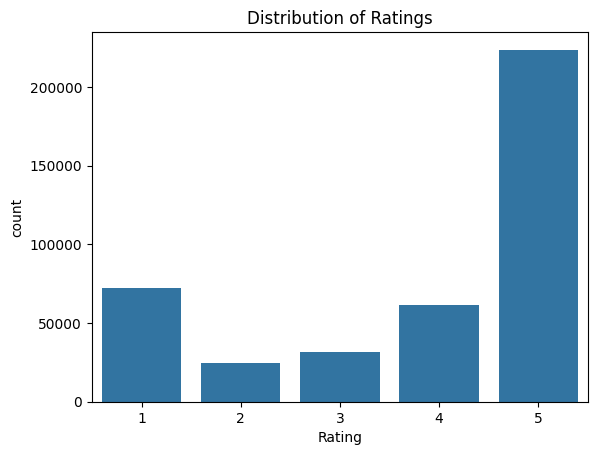

In [ ]:
#Distribution of Ratings
sns.countplot(x='Rating', data=df2)
plt.title('Distribution of Ratings')
plt.show()

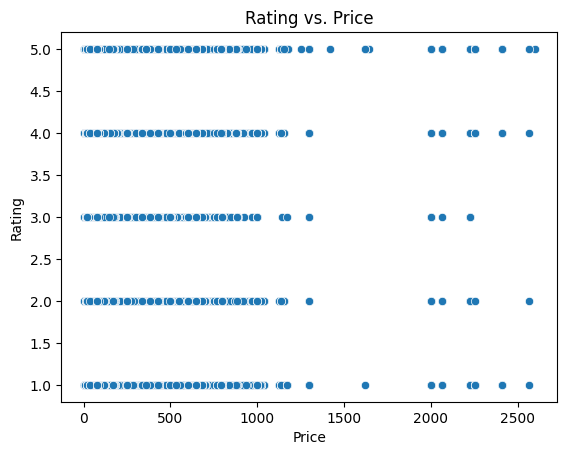

In [ ]:
#Rating vs. Price Scatter Plot
sns.scatterplot(x='Price', y='Rating', data=df2)
plt.title('Rating vs. Price')
plt.show()

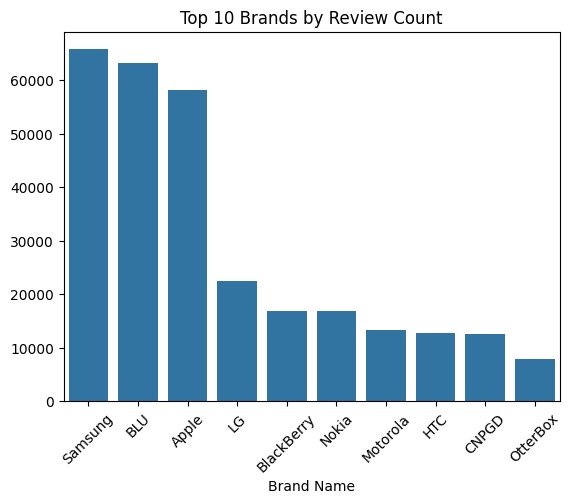

In [ ]:
#Top 10 Brands by Review Count
top_brands = df2['Brand Name'].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Brands by Review Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def text_preprocessing(text):
    if not isinstance(text, str):
        return ""  # return empty string if text is NaN or not string

    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove digits
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    words = text.split()
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return ' '.join(words)


In [ ]:
df2['Cleaned_Reviews'] = df2['Reviews'].apply(text_preprocessing)

In [ ]:
df2['Cleaned_Reviews']

,Cleaned_Reviews
0,feel lucky used phone used hard phone line upg...
1,nice phone nice grade pantach revue clean set ...
2,pleased
3,works good goes slow good phone love
4,great phone replace lost phone thing volume bu...
...,...
413835,great deal great price
413836,ok
413837,passes drop test porcelain tile
413838,returned did meet needs good selection


In [ ]:
# Vectorize the text using TfidfVectorizer
vectorizing = TfidfVectorizer(stop_words='english', max_features=5000)
rev_vector = vectorizing.fit_transform(df2['Cleaned_Reviews'])

#### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(rev_vector)

df2['KMeans_Cluster'] = kmeans_labels


In [ ]:
df2[["Reviews","Cleaned_Reviews","KMeans_Cluster"]]

,Reviews,Cleaned_Reviews,KMeans_Cluster
0,I feel so LUCKY to have found this used (phone...,feel lucky used phone used hard phone line upg...,2
1,"nice phone, nice up grade from my pantach revu...",nice phone nice grade pantach revue clean set ...,2
2,Very pleased,pleased,2
3,It works good but it goes slow sometimes but i...,works good goes slow good phone love,0
4,Great phone to replace my lost phone. The only...,great phone replace lost phone thing volume bu...,2
...,...,...,...
413835,another great deal great price,great deal great price,1
413836,Ok,ok,2
413837,Passes every drop test onto porcelain tile!,passes drop test porcelain tile,2
413838,I returned it because it did not meet my needs...,returned did meet needs good selection,2


In [ ]:
df2["KMeans_Cluster"].unique()

array([2, 0, 1, 3, 4], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample input to speed up processing
sample_size = 5000
df2_sample = df2['Cleaned_Reviews'].dropna().sample(sample_size, random_state=42).reset_index(drop=True)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df2_sample)

In [ ]:
#1. K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

In [ ]:
#2. DBSCAN
scaled_vectors = StandardScaler(with_mean=False).fit_transform(tfidf_matrix)
dbscan = DBSCAN(eps=1.2, min_samples=10, metric='cosine')
dbscan_labels = dbscan.fit_predict(scaled_vectors)

In [ ]:
#3. Hierarchical

# Use Euclidean to avoid zero vector issues
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglo_labels = agglo.fit_predict(tfidf_matrix.toarray())

In [ ]:
#  4. Word2Vec + KMeans
tokens = df2_sample.apply(lambda x: x.split())
w2v_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4, sg=1)
def avg_vector(words):
    vectors = [w2v_model.wv[w] for w in words if w in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)
word2vec_vectors = np.array([avg_vector(text) for text in tokens])
kmeans_w2v = KMeans(n_clusters=5, random_state=42)
w2v_labels = kmeans_w2v.fit_predict(word2vec_vectors)

In [ ]:
# 5. BERT + KMeans
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
bert_embeddings = bert_model.encode(df2_sample.tolist(), show_progress_bar=True)
kmeans_bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_embeddings)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


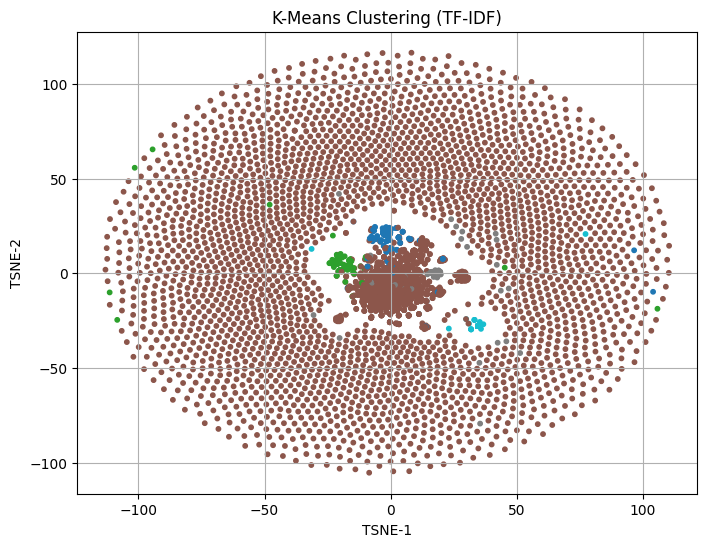

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


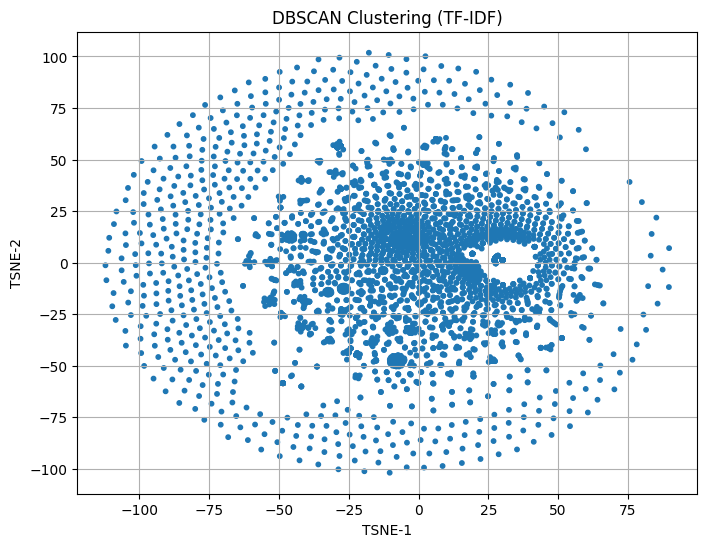

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


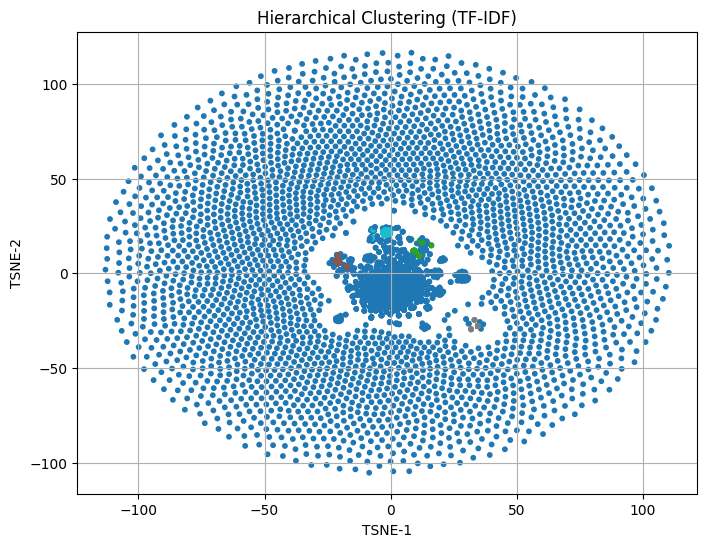

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


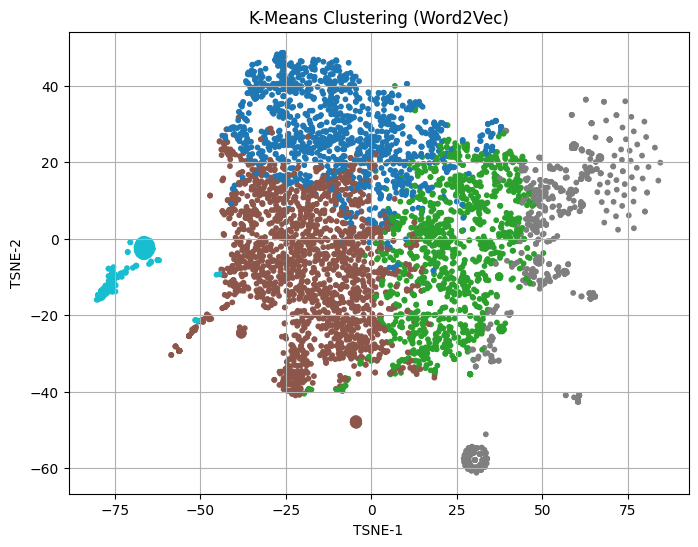

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


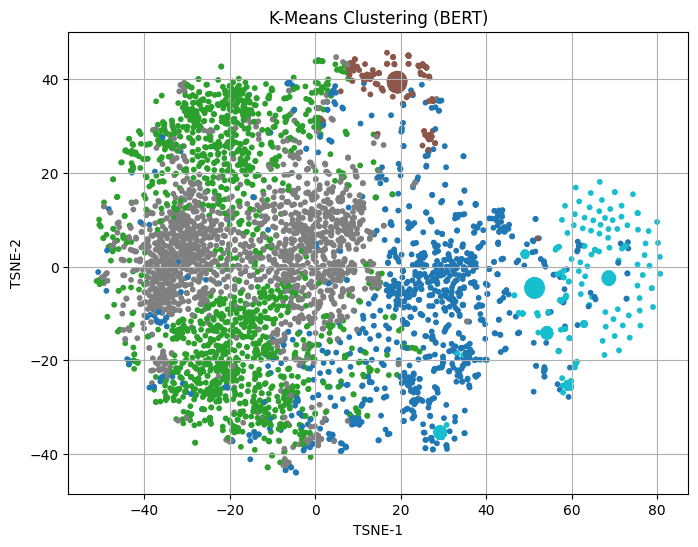

In [ ]:
# Visualization using TSNE
def plot_clusters(X, labels, title):
    tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1000)
    tsne_result = tsne.fit_transform(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', s=10)
    plt.title(title)
    plt.xlabel("TSNE-1")
    plt.ylabel("TSNE-2")
    plt.grid(True)
    plt.show()

# Plotting all clustering results
plot_clusters(tfidf_matrix.toarray(), kmeans_labels, "K-Means Clustering (TF-IDF)")
plot_clusters(scaled_vectors.toarray(), dbscan_labels, "DBSCAN Clustering (TF-IDF)")
plot_clusters(tfidf_matrix.toarray(), agglo_labels, "Hierarchical Clustering (TF-IDF)")
plot_clusters(word2vec_vectors, w2v_labels, "K-Means Clustering (Word2Vec)")
plot_clusters(bert_embeddings, bert_labels, "K-Means Clustering (BERT)")

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**






**Write your response here:**

.Clustering the visualization using different technique show differences in how each method group text data. K-means clustering with TF-IDF shows weak separation as clusters form a dense center with no proper boundaries revealing poor distinctions in high-dimensional sparse data. DBSCAN, while good at detecting noise,struggles with sparse data, resulting in a single dominant cluster and scattered outliers. Hierarchical clustering shows moderate improvement but still lacks distinct separation. In contrast, K-means with Word2Vec resulted in clearer and more separated groupings that demonstrated semantic understanding through dense vector representations. The best result found in K-means with BERT, which shows clean, and clearly separated clusters, showing BERT's strength in capturing contextual meaning in text and offering superior embeddings for clustering tasks.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

